<a href="https://colab.research.google.com/github/MuGrahiman/ML_DiomondPrizePrediction/blob/main/DiomondPrizePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diomond Prize Prediction**

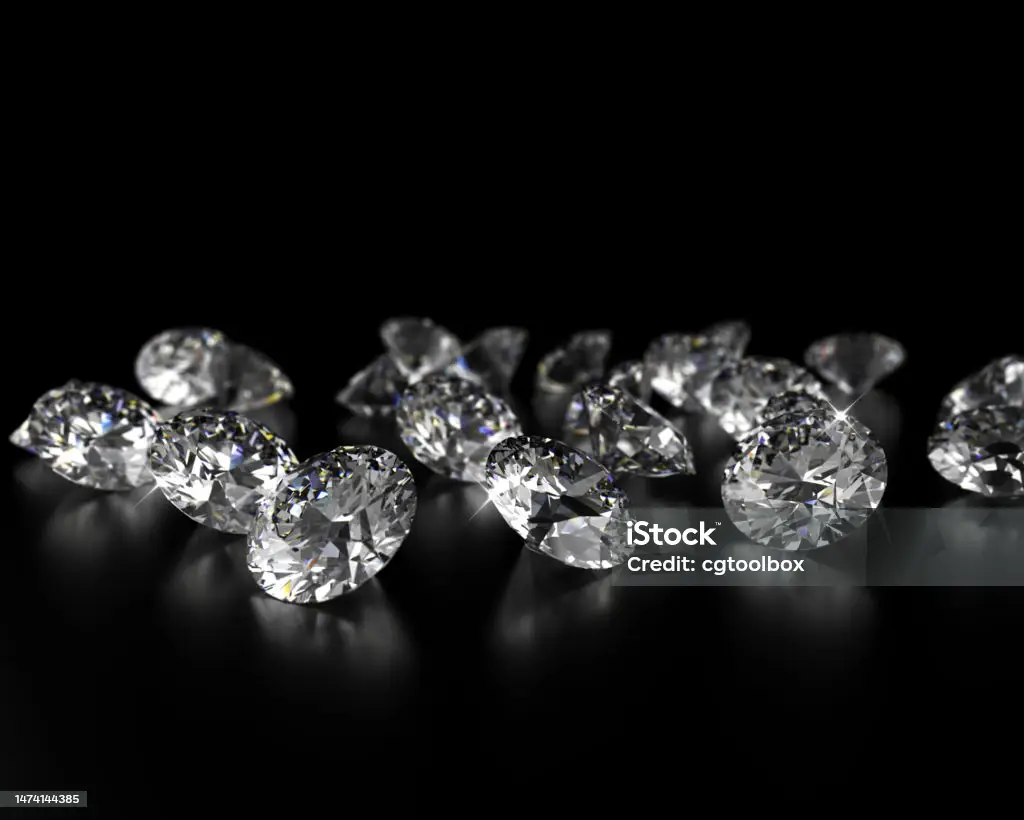

I have considered the classic Diamonds dataset which contains the prices and other attributes of almost 54,000 diamonds and this dataset is hosted on Kaggle. The dataset contains 53940 rows and 10 variables. x,y,z represents the length,width and depth simultaniously

###**1. Loading data**




In [63]:
import pandas as pd
data=pd.read_csv("/content/sample_data/diamonds.csv")

### showing first five rows

In [64]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### showing last five row data


In [65]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


###  showing rows and columns

In [66]:
data.shape

(53940, 11)

### showing data size (row x columns)

In [67]:
data.size

593340


###**2. PreProcessing**




* **Purpose**: Preprocessing is aimed at preparing the data for modeling. It involves cleaning and transforming the data to make it suitable for machine learning algorithms.
* **Techniques**: Common preprocessing steps include handling missing values, encoding categorical variables, scaling numerical features, and normalizing data.
* **Outcome**: The goal is to improve the quality of the data and ensure that it meets the requirements of the chosen machine learning algorithms.

### showing the datatype of value in each columns

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Checking Percentage of null values in each DataFrame column.

In [69]:
data.isnull().mean()*100

,0
Unnamed: 0,0.0
carat,0.0
cut,0.0
color,0.0
clarity,0.0
depth,0.0
table,0.0
price,0.0
x,0.0
y,0.0


### Drop the column “Unnamed: 0”, which is unnecessary


In [70]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Generates summary statistics for numerical DataFrame columns.

In [71]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Observed that the mean value of x (length), y(width) & z(depth) is zero and It doesn’t make any sense to have length\width\depth of a diamond to be zero.

### Remove the NaN value

In [72]:
data.dropna()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [73]:
data.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


### Plot the distributions of numerical attributes by using hist() method
represent the data distribution by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.


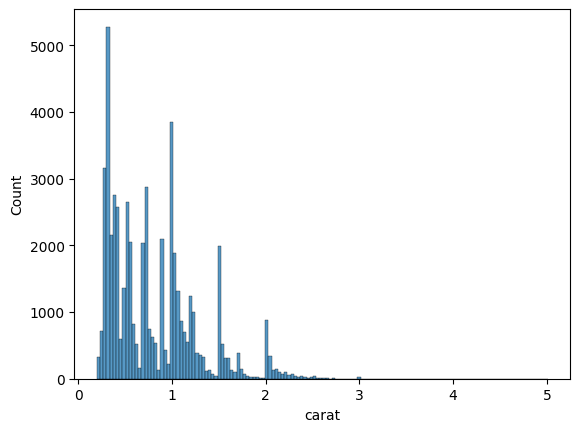

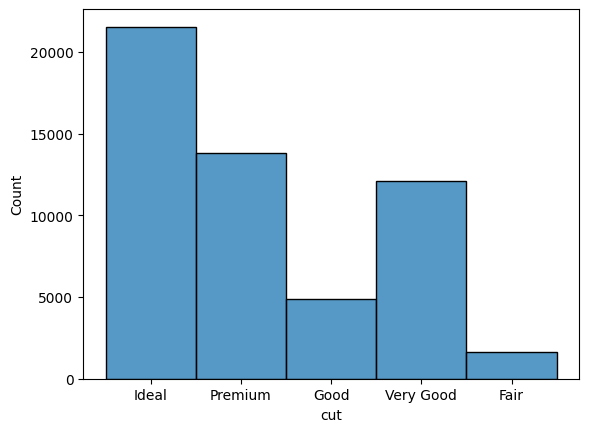

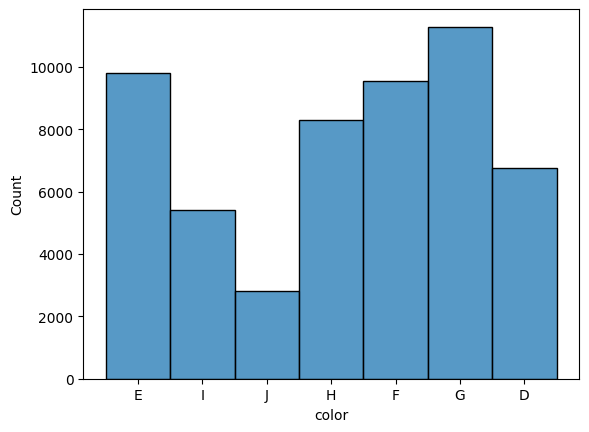

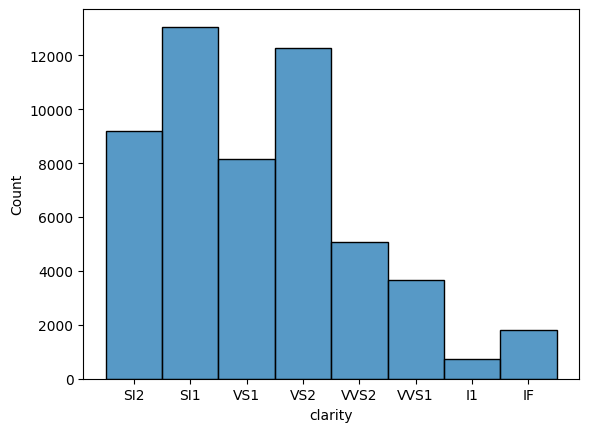

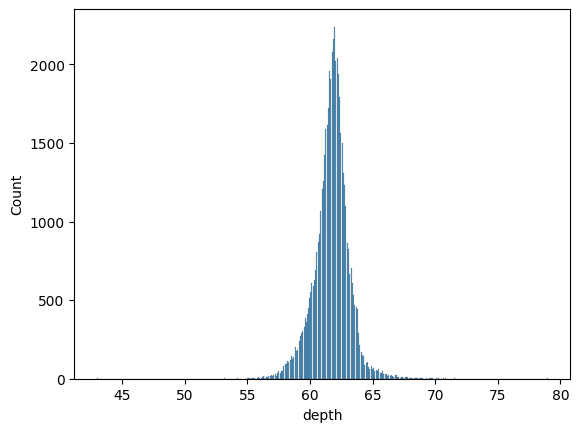

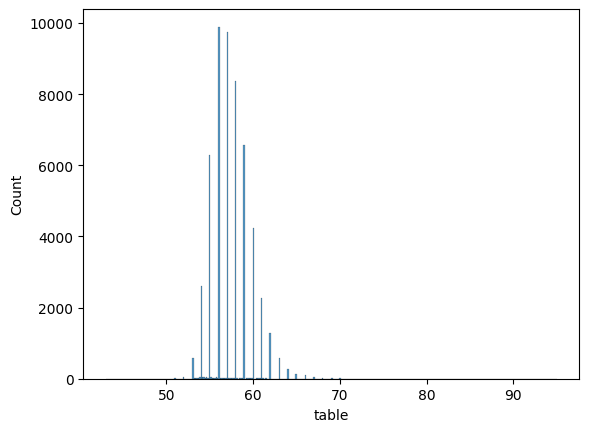

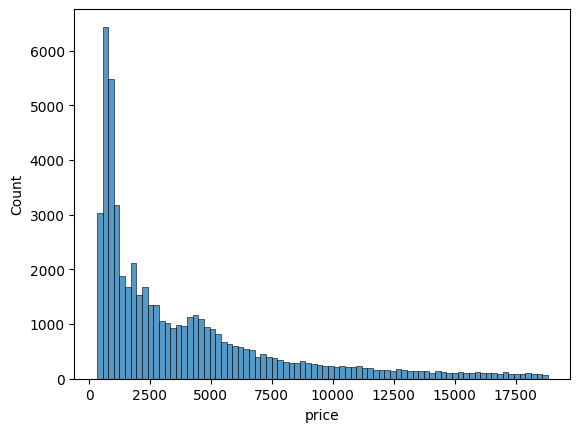

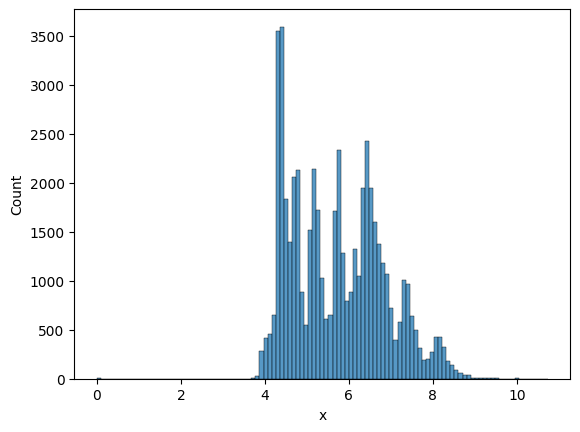

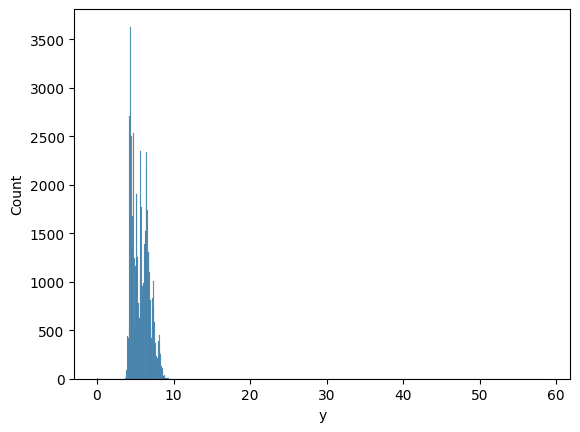

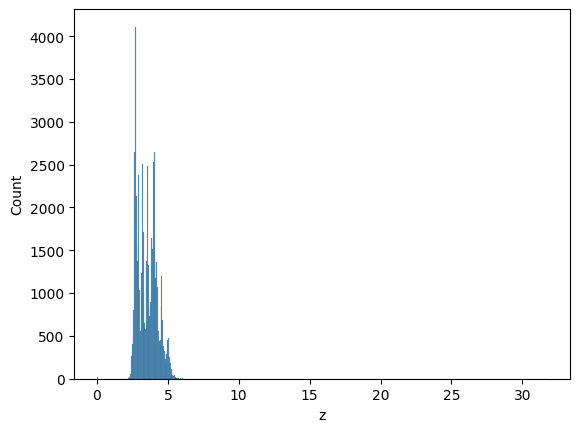

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in data.columns:
    if data[i].dtypes != "Object":
        sns.histplot(x=data[i])
        plt.show()

###**3. Outlier analysis**
Outlier detection is a crucial step in data preprocessing and analysis, helping to ensure data quality, improve model performance, and uncover valuable insights from the dataset.<br>
<u>**Overfitting** and **underfitting**</u><br>
this are two common issues that arise during the training of machine learning models.<br>
**Overfitting :**result will be accurate on training but poor in test period<br>
**Underfitting :**result will be poop on training and

```
# This is formatted as code
```

 test period<br>



### Box Plot
Boxplots are a measure used to identify the outlier. It divides the data set into three quartiles. This graph represents the minimum, maximum, median, first quartile and third quartile in the data set.

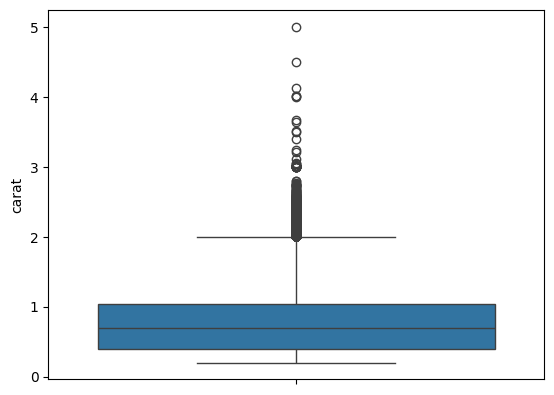

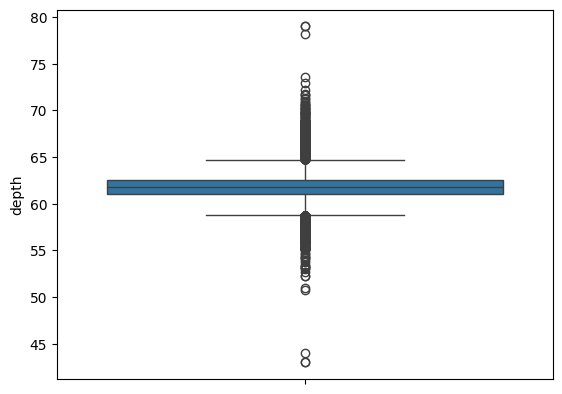

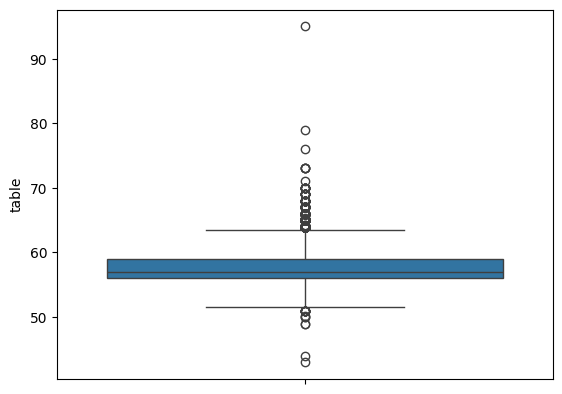

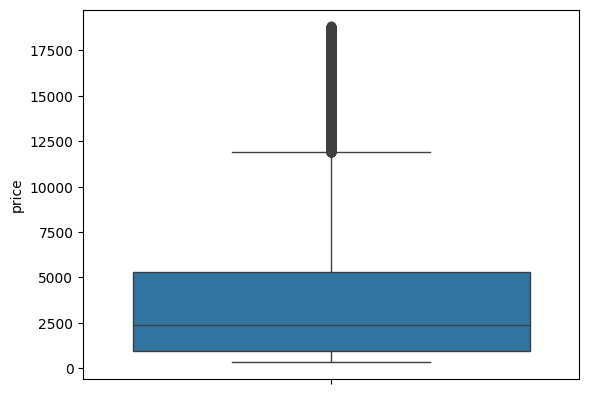

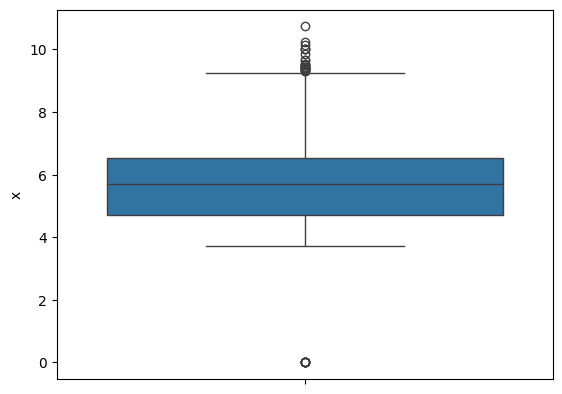

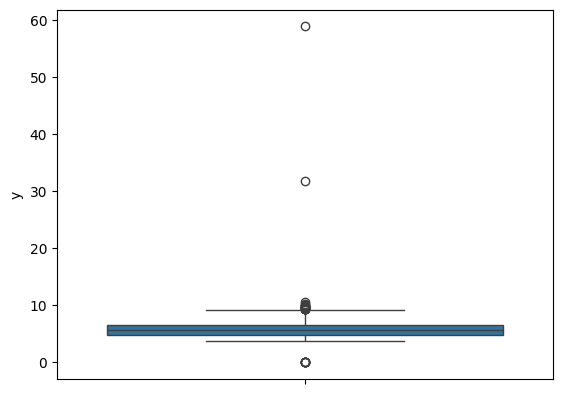

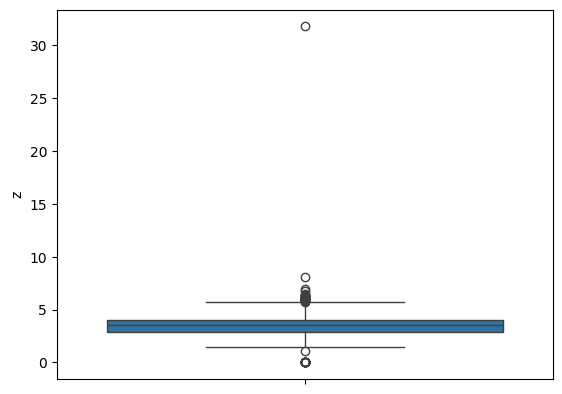

In [75]:
import seaborn as sns

for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y=data[i])
        plt.show()

Here we can see that lot of outliers. so we need to treat the outliers using Three sigma rule (or) outlier treatment

In [76]:
import numpy as np


In [77]:
# three inter quartile range
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [78]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [79]:
for i in data.columns:
    if data[i].dtype !="object":
        UL,LL=outlier_limit(data[i])
        data[i]=np.where((data[i]>UL)|(data[i]<LL),np.nan,data[i])

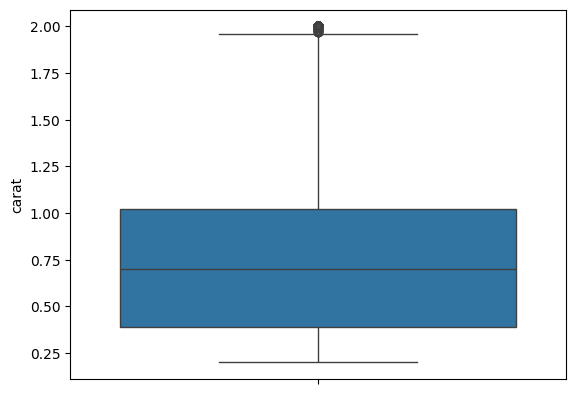

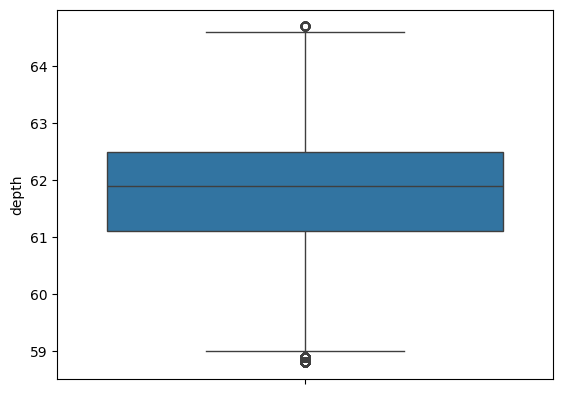

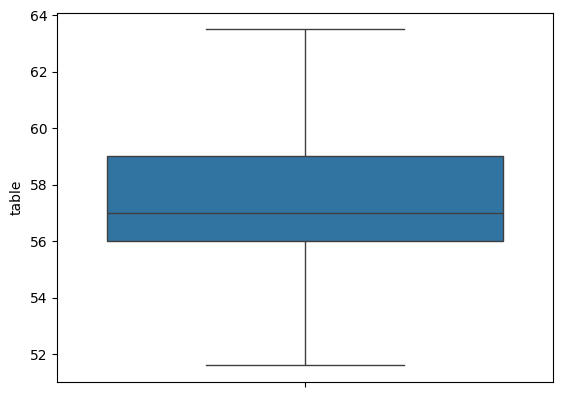

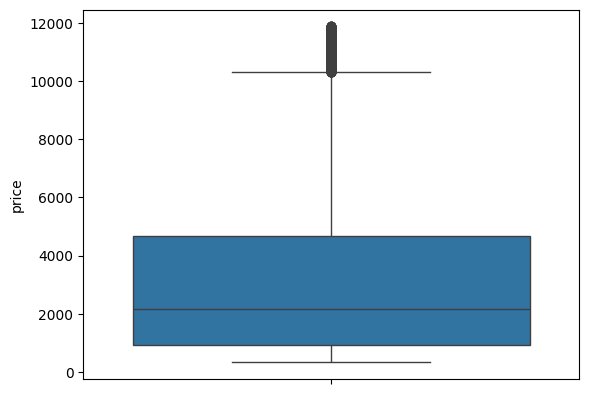

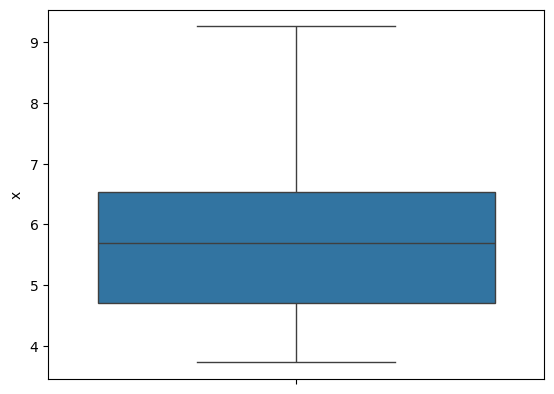

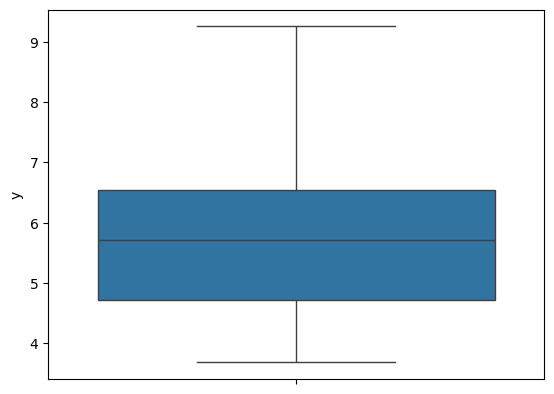

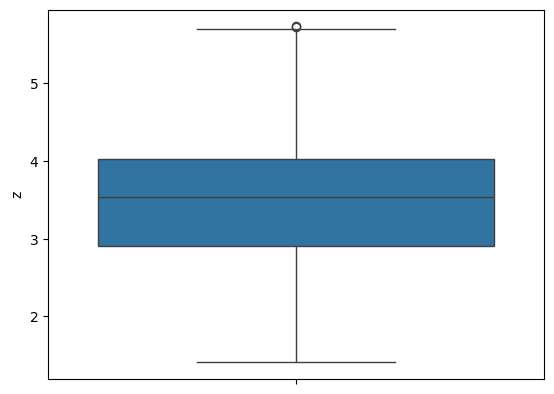

In [80]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y=data[i])
        plt.show()

After the outlier treatment the outliers are removed. But some nan values are occured during the outlier treatment.we drop the nan values using dropna() function


In [81]:
data.dropna(inplace=True)


### Label encoding :
#### it is a technique used in machine learning to convert categorical variables into numerical format


In [82]:
from sklearn.preprocessing import LabelEncoder,RobustScaler

le=LabelEncoder()
data["cut"]=le.fit_transform(data["cut"])
data["color"]=le.fit_transform(data["color"])
data["clarity"]=le.fit_transform(data["clarity"])

###**4. Corrilation Checking**
statistical method used to evaluate the strength and direction of relationships between variables in a dataset













### **Heat Map :** used to show the corrilation



<Axes: >

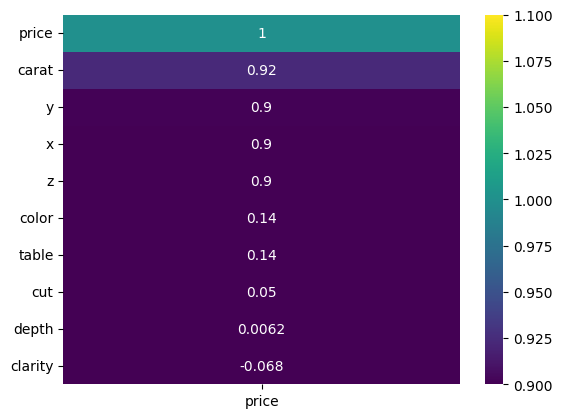

In [83]:
sns.heatmap(data.corr()[['price']].sort_values(by="price",ascending=False),vmin=1,vmax=1,annot=True,cmap='viridis')


In [84]:
data.corr()[["price"]].sort_values(by="price",ascending=False)


,price
price,1.000000
carat,0.922932
y,0.900985
x,0.899843
z,0.896579
color,0.140451
table,0.136834
cut,0.050275
depth,0.006180
clarity,-0.068051


Lets take only the columns with good correlation with the target


In [85]:
x=data[["carat","y","x","z"]].values


In [86]:
y=data[["price"]].values


###**4. Feature Scaling**
step used to standardizes the range of independent variables improves model performance, enhances convergence speed, and ensures that all features contribute equally to the model

In [87]:
rs=RobustScaler()
x=rs.fit_transform(x)
x

array([[-0.58730159, -0.83522727, -0.84180791, -0.83035714],
       [-0.61904762, -0.91477273, -0.87570621, -0.9375    ],
       [-0.49206349, -0.69318182, -0.70056497, -0.65178571],
       ...,
       [ 0.15873016,  0.13068182,  0.12429379,  0.17857143],
       [ 0.41269841,  0.38068182,  0.40112994,  0.33928571],
       [ 0.23809524,  0.23863636,  0.22033898,  0.25      ]])

###**5. Model Selection**


In [88]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,\
ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split


In [89]:
models=({
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
   " DecisionTreeRegressor":DecisionTreeRegressor(),
   " GradientBoostingRegressor":GradientBoostingRegressor(),
   " AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
})

In [90]:
for name,model in models.items():
    scores = cross_val_score(model,x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model :{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print("Average RMSe: ",rmse_average)
    print("*"*100)

cross validation model :LinearRegression
Average RMSe:  949.0082607597199
****************************************************************************************************
cross validation model :Ridge
Average RMSe:  949.0373553929379
****************************************************************************************************
cross validation model :LinearSVR
Average RMSe:  997.7877466242928
****************************************************************************************************
cross validation model : DecisionTreeRegressor
Average RMSe:  1347.0319191818373
****************************************************************************************************
cross validation model : GradientBoostingRegressor
Average RMSe:  1030.1777001679563
****************************************************************************************************
cross validation model : AdaBoostRegressor
Average RMSe:  1113.7668123392546
************************************************

From the cross validation score we find that LinearRegression have the least Average RMSE value, So lets select the LinearRegressor for the modeling.

In [91]:
model=LinearRegression()

###**6. Training**


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [93]:
model.fit(x_train,y_train)


LinearRegression()

In [94]:
training_score=model.score(x_train,y_train)
training_score

0.8582563581537332

In [95]:
testing_score=model.score(x_test,y_test)
testing_score

0.8608078415776681

In [96]:
y_pred= model.predict(x)


In [97]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

R2_Score=r2_score(y,y_pred)*100
R2_Score

85.87604289665714

In [98]:

Prediction=pd.DataFrame(zip(y,y_pred),columns=('Actual','Predicted'),dtype=float)
Prediction

,Actual,Predicted
0,326.0,326.087072
1,326.0,171.613162
2,334.0,539.449064
3,335.0,462.119891
4,336.0,312.856370
...,...,...
47519,2757.0,3085.557611
47520,2757.0,2999.930846
47521,2757.0,2803.436225
47522,2757.0,3928.255092


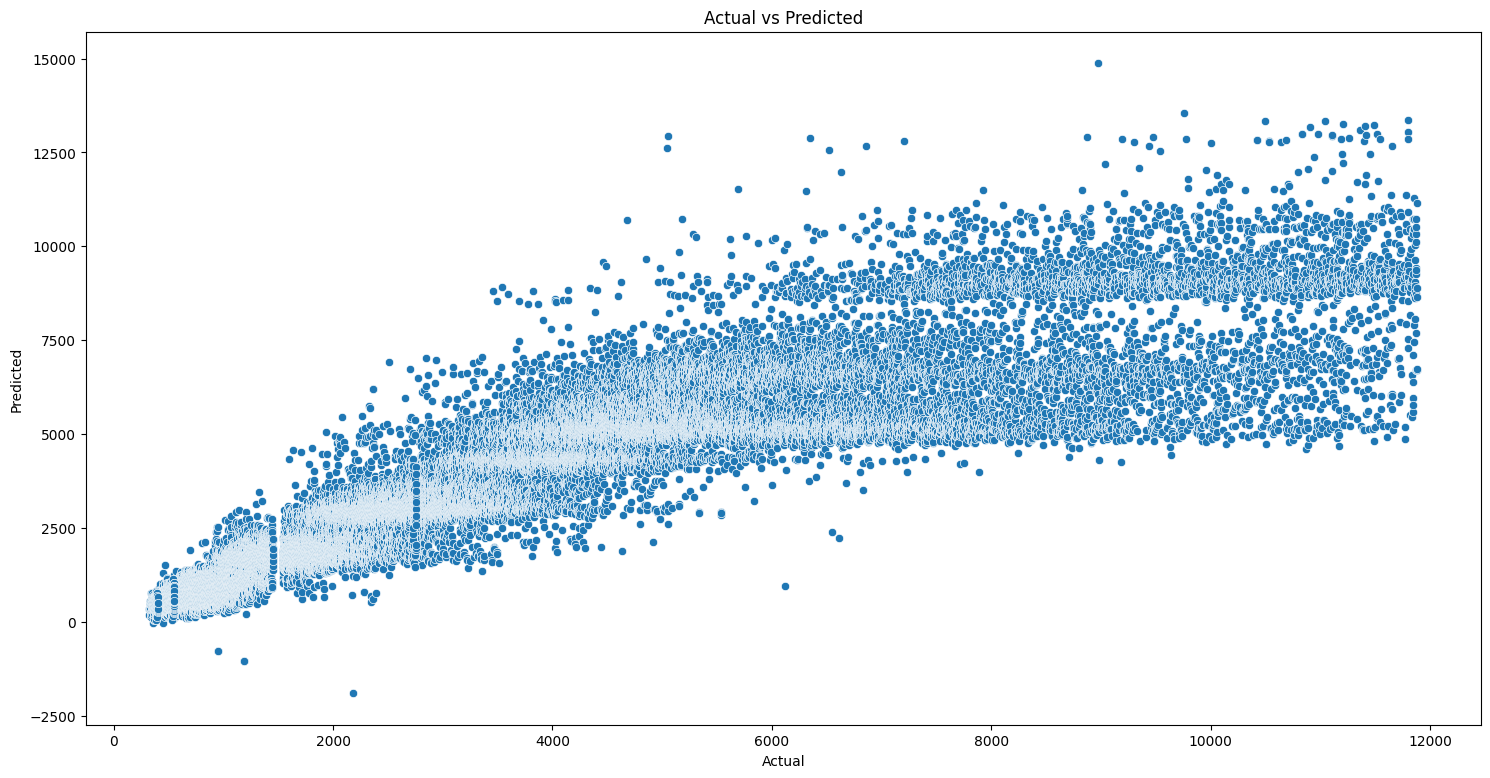

In [99]:
plt.figure(figsize=(18,9))
plt.title("Actual vs Predicted")
sns.scatterplot(data=Prediction,x="Actual",y="Predicted")
plt.show()

In [100]:
data.to_csv('diamond_cleaned.csv')


In [101]:
data=pd.read_csv("diamond_cleaned.csv")
data.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
3,4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
4,5,0.24,4,6,7,62.8,57.0,336.0,3.94,3.96,2.48
